In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression

In [14]:
fire_year = "../output_data/fire_sum_year.csv"
rain_year = "../output_data/precip_sum_year.csv"

fire_year_sum_df = pd.read_csv(fire_year)
rain_year_sum_df = pd.read_csv(rain_year)

In [15]:
#merge Dataframes
merded_year_fire_rain = pd.merge(fire_year_sum_df, rain_year_sum_df, on=['year'])
merded_year_fire_rain

,year,Number of Fires,precipitation
0,1998,123881,16444.3
1,1999,132526,18499.7
2,2000,97541,18510.7
3,2001,137926,16345.5
4,2002,220015,15949.3
5,2003,208476,15834.6
6,2004,248928,17218.5
7,2005,224294,16782.1
8,2006,123327,19357.0
9,2007,206412,17513.3


In [17]:
# axis and ticks
x_axis_fire_rain = list(merded_year_fire_rain.year)
tick_locations = [value for value in x_axis_fire_defo]

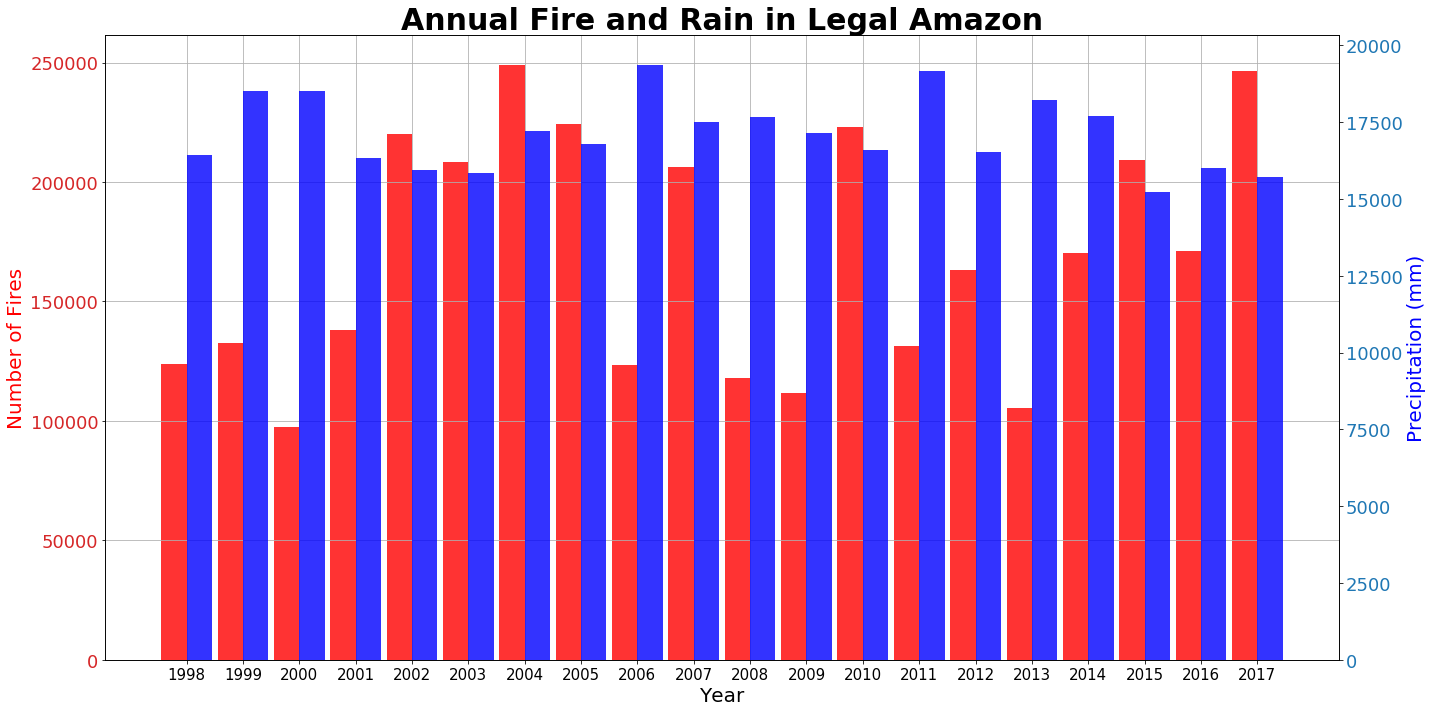

In [19]:
# Create 2 bar graph in the same fig for Annual fire and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))

# Fire
for index, row in merded_year_fire_rain.iterrows():
    def_graph = ax1.bar(merded_year_fire_rain["year"][index], merded_year_fire_rain["Number of Fires"][index],  color='r', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Annual Fire and Rain in Legal Amazon", fontweight = "bold", fontsize = 30)
ax1.set_xlabel("Year",fontsize = 20)
ax1.set_ylabel("Number of Fires",fontsize = 20, color ='r')
ax1.tick_params(axis='y',labelcolor='tab:red', labelsize = 18)

# Rain
ax2 = ax1.twinx()
for index, row in merded_year_fire_rain.iterrows():
    rain_graph = ax2.bar(merded_year_fire_rain["year"][index], merded_year_fire_rain["precipitation"][index],  color='b', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("Precipitation (mm)",fontsize = 20, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue', labelsize = 18)

#other configurations
plt.xticks(tick_locations, x_axis_fire_rain, rotation=90)
ax1.tick_params(axis='x',labelsize = 15)
plt.tight_layout()
ax1.grid()

#save figure
plt.savefig("../output_data/images/fire_rain_year.png", dpi=fig.dpi)
plt.show()

In [47]:
#open files
fire_state = "../output_data/fire_mean_state.csv"
rain_state = "../output_data/precip_mean_state.csv"

fire_mean_df = pd.read_csv(fire_state)
rain_state_df = pd.read_csv(rain_state)

In [49]:
fire_mean_df

,State,Number of Fires
0,AC,3417.25
1,AM,5873.35
2,AP,1255.80
3,MA,18763.95
4,MT,32729.50
5,PA,28892.05
6,RO,9269.35
7,RR,1472.70
8,TO,10621.60


In [50]:
rain_state_df

,state,precipitation
0,AC,166.022176
1,AM,193.744770
2,AP,207.713445
3,MA,174.100837
4,MT,120.525877
5,PA,275.702510
6,RR,150.466946
7,TO,150.956485


In [51]:
new_fire_mean_df = fire_mean_df.rename(columns={"State": "state"})
new_fire_mean_df

,state,Number of Fires
0,AC,3417.25
1,AM,5873.35
2,AP,1255.80
3,MA,18763.95
4,MT,32729.50
5,PA,28892.05
6,RO,9269.35
7,RR,1472.70
8,TO,10621.60


In [52]:
# The Rondonia state (RO) is missing from the Rain data,
# the merged data will have only 8 of the 9 states from Legal Amazon.
state_merged_mean = rain_state_df.merge(new_fire_mean_df, on='state')
state_merged_mean.to_csv("../output_data/merged_fire_rain_mean.csv")
state_merged_mean


,state,precipitation,Number of Fires
0,AC,166.022176,3417.25
1,AM,193.744770,5873.35
2,AP,207.713445,1255.80
3,MA,174.100837,18763.95
4,MT,120.525877,32729.50
5,PA,275.702510,28892.05
6,RR,150.466946,1472.70
7,TO,150.956485,10621.60


In [53]:
# axis
xaxis = list(state_merged_mean.state)
xaxis

['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'TO']

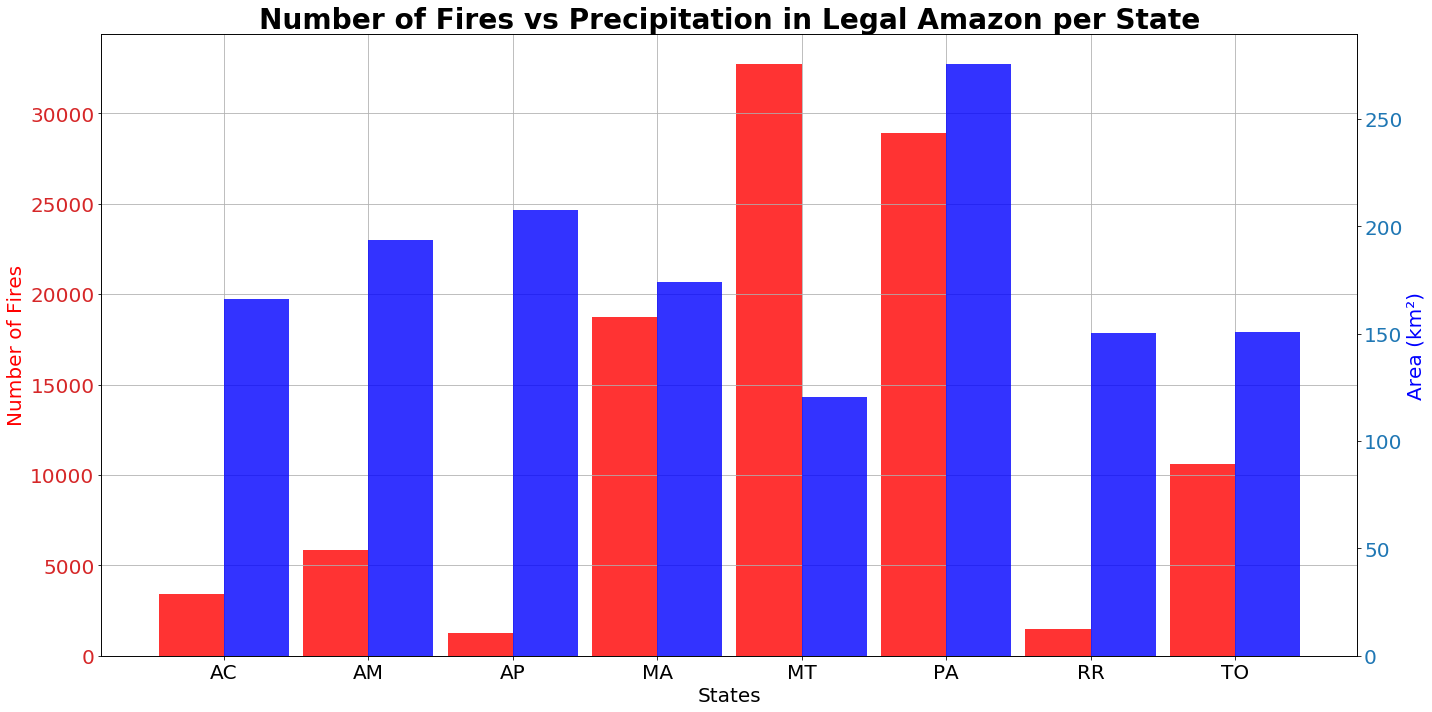

In [60]:
# Create 2 bar graph in the same fig for Deforestation and Fires by state in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))
# Deforestation
for index, row in state_merged_mean.iterrows():
    def_graph = ax1.bar(state_merged_mean["state"][index], state_merged_mean["Number of Fires"][index],color='red', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Number of Fires vs Precipitation in Legal Amazon per State", fontweight = "bold", fontsize = 28)
ax1.set_xlabel("States",fontsize = 20)
ax1.set_ylabel("Number of Fires",fontsize = 20, color ='r')
ax1.tick_params(axis='y',labelcolor='tab:red', labelsize = 20)
# Rain
ax2 = ax1.twinx()
for index, row in state_merged_mean.iterrows():
    rain_graph = ax2.bar(state_merged_mean["state"][index], state_merged_mean["precipitation"][index],color='blue', alpha=.8,\
                        align="edge",width=+0.45)
ax2.set_ylabel("Precipitation (mm)",fontsize = 20, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue', labelsize = 20)
#other configurations
plt.xticks(xaxis, rotation=90)
ax1.tick_params(axis='x',labelsize = 20)
plt.tight_layout()
ax1.grid()
#save figure
plt.savefig("../output_data/images/fire_rain_state.png", dpi=fig.dpi)
plt.show()

[[0.00039621]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.541
Model:                            OLS   Adj. R-squared (uncentered):              0.476
Method:                 Least Squares   F-statistic:                              8.264
Date:                Mon, 25 May 2020   Prob (F-statistic):                      0.0238
Time:                        14:41:53   Log-Likelihood:                         -86.345
No. Observations:                   8   AIC:                                      174.7
Df Residuals:                       7   BIC:                                      174.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

C:\Users\joaog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


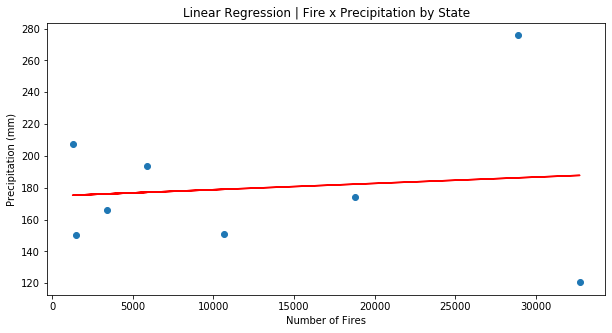

In [62]:
# Correlation Deforestation x Rain

fig, ax = plt.subplots(figsize=(10, 5))

X = state_merged_mean['Number of Fires'].values.reshape(-1, 1)
Y = state_merged_mean['precipitation'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
# perform linear regression
linear_regressor.fit(X, Y)
# make predictions
Y_pred = linear_regressor.predict(X)
# correlation matrices
#correlation coefficient

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
#plt.set_xlabel("mm",fontsize = 18, color ='b')


print(linear_regressor.coef_)
# Correlation Coefficient
# and R-square
state_merged_mean.corr(method ='pearson')
model1=sm.OLS(X,Y)
result=model1.fit()
print(result.summary())
plt.title("Linear Regression | Fire x Precipitation by State")
plt.xlabel("Number of Fires")
plt.ylabel("Precipitation (mm)")
plt.savefig("../output_data/images/lr_fire_rain.png", dpi=fig.dpi)
plt.show()
